# Statistics in Python
written by: Ejaz ur Rehman\
date: 2025-02-07\
email: ijazfinance@gmail.com

### 1. Descriptive Statistics

In [16]:
# Load the Titanic Dataset & Required Liabraries
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Display first few rows
numeric_df.head()


,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [17]:
!pip install scipy


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
import scipy
print(scipy.__version__)


1.15.1


In [19]:
# Compute the Required Statistics
mean = numeric_df.mean()
standard_error = numeric_df.sem()
median = numeric_df.median()
mode = numeric_df.mode().iloc[0]  # Taking the first mode value
std_dev = numeric_df.std()
sample_variance = numeric_df.var()
kurtosis = numeric_df.kurt()
skewness = numeric_df.skew()
range_values = numeric_df.max() - numeric_df.min()
minimum = numeric_df.min()
maximum = numeric_df.max()
sum_values = numeric_df.sum()
count_values = numeric_df.count()
largest_1 = numeric_df.apply(lambda x: x.nlargest(1).values[0])
smallest_1 = numeric_df.apply(lambda x: x.nsmallest(1).values[0])
confidence_level = 0.95  # 95% Confidence Interval
alpha = 1 - confidence_level  # Significance level
df_count = numeric_df.count()  # Sample size (n)

# Degrees of freedom (n-1)
df_degrees = df_count - 1  

# t-critical value for 95% CI
t_critical = stats.t.ppf(1 - (alpha / 2), df_degrees)

# Compute Lower & Upper CI
lower_CI = mean - (t_critical * standard_error)
upper_CI = mean + (t_critical * standard_error)



In [20]:
stats_df = pd.DataFrame({
    "Mean": mean,
    "Standard Error": standard_error,
    "Median": median,
    "Mode": mode,
    "Standard Deviation": std_dev,
    "Sample Variance": sample_variance,
    "Kurtosis": kurtosis,
    "Skewness": skewness,
    "Range": range_values,
    "Minimum": minimum,
    "Maximum": maximum,
    "Sum": sum_values,
    "Count": count_values,
    "Largest(1)": largest_1,
    "Smallest(1)": smallest_1,
    "Lower 95% CI": lower_CI,
    "Upper 95% CI": upper_CI
})

# Display the statistics
print(stats_df)


               Mean  Standard Error   Median   Mode  Standard Deviation  \
survived   0.383838        0.016301   0.0000   0.00            0.486592   
pclass     2.308642        0.028009   3.0000   3.00            0.836071   
age       29.699118        0.543640  28.0000  24.00           14.526497   
sibsp      0.523008        0.036943   0.0000   0.00            1.102743   
parch      0.381594        0.027004   0.0000   0.00            0.806057   
fare      32.204208        1.664792  14.4542   8.05           49.693429   

          Sample Variance   Kurtosis  Skewness     Range  Minimum   Maximum  \
survived         0.236772  -1.775005  0.478523    1.0000     0.00    1.0000   
pclass           0.699015  -1.280015 -0.630548    2.0000     1.00    3.0000   
age            211.019125   0.178274  0.389108   79.5800     0.42   80.0000   
sibsp            1.216043  17.880420  3.695352    8.0000     0.00    8.0000   
parch            0.649728   9.778125  2.749117    6.0000     0.00    6.0000   


### 2. Normality Test

##### 2.1 Shapiro-Wilk Test

Shapiro-Wilk Test statistic: 0.9814577414504954
P-value: 7.337348958673592e-08
The data is likely not normally distributed.


Text(0.5, 1.0, 'Shapiro-Wilk Test Result (Histogram)')

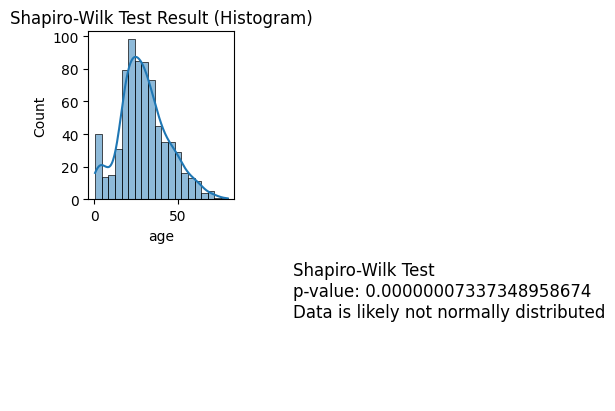

In [21]:
# The Shapiro-Wilk test is used to check the null hypothesis that the data follows a normal distribution
import seaborn as sns
import pandas as pd
import matplotlib .pyplot as plt
from scipy import stats

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Drop NaN values
age_data = numeric_df['age'].dropna()

# Perform Shapiro-Wilk test for normality on 'age' column
stat, p_value = stats.shapiro(numeric_df['age'].dropna())  # Drop NaN values

print(f"Shapiro-Wilk Test statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret result
if p_value > 0.05:
    print("The data is likely normally distributed.")
else:
    print("The data is likely not normally distributed.")

# Shapiro-Wilk Test Interpretation
plt.subplot(2, 3, 5)
if p_value > 0.05:
    plt.text(0.2, 0.5, f"Shapiro-Wilk Test\np-value: {p_value:.20f}\nData is likely normally distributed", fontsize=12)
else:
    plt.text(0.2, 0.5, f"Shapiro-Wilk Test\np-value: {p_value:.20f}\nData is likely not normally distributed", fontsize=12)
plt.axis('off')

# Shapiro-Wilk test result plot
plt.subplot(2, 3, 1)
sns.histplot(age_data, kde=True)
plt.title('Shapiro-Wilk Test Result (Histogram)')



##### 2.2 Kolmogorov-Smirnov Test

Kolmogorov-Smirnov Test statistic: 0.9650366565902186
P-value: 7.337348958673592e-08
The data is likely not normally distributed.


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

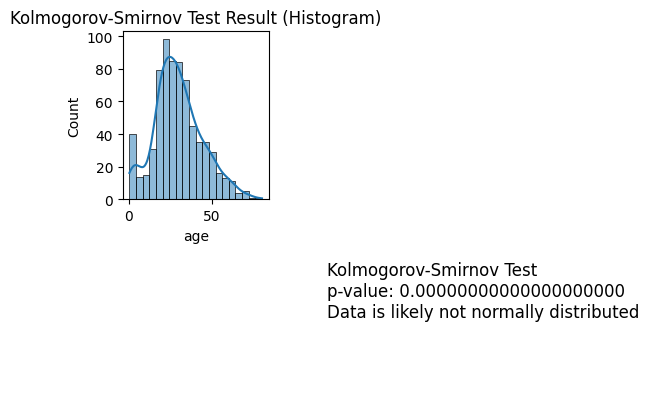

In [22]:
# The Kolmogorov-Smirnov test compares the sample distribution to a specified distribution (e.g., normal).

# Perform Kolmogorov-Smirnov test for normality on 'age' column
stat, p_value_ks = stats.kstest(numeric_df['age'].dropna(), 'norm')

print(f"Kolmogorov-Smirnov Test statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret result
if p_value > 0.05:
    print("The data is likely normally distributed.")
else:
    print("The data is likely not normally distributed.")

# Kolmogorov-Smirnov test result plot
plt.subplot(2, 3, 2)
sns.histplot(age_data, kde=True)
plt.title('Kolmogorov-Smirnov Test Result (Histogram)')

# Kolmogorov-Smirnov Test Interpretation
plt.subplot(2, 3, 6)
if p_value_ks > 0.05:
    plt.text(0.2, 0.5, f"Kolmogorov-Smirnov Test\np-value: {p_value_ks:.20f}\nData is likely normally distributed", fontsize=12)
else:
    plt.text(0.2, 0.5, f"Kolmogorov-Smirnov Test\np-value: {p_value_ks:.20f}\nData is likely not normally distributed", fontsize=12)
plt.axis('off')



##### 2.3 Anderson-Darling Test

Statistic: 3.8230373853616584
Critical values: [0.573 0.652 0.783 0.913 1.086]
Significance level: [15.  10.   5.   2.5  1. ]
The data is likely not normally distributed.
Anderson-Darling Test Statistic: 3.8230373853616584
Critical Values: [0.573 0.652 0.783 0.913 1.086]
Significance Level: [15.  10.   5.   2.5  1. ]
The data is likely not normally distributed.


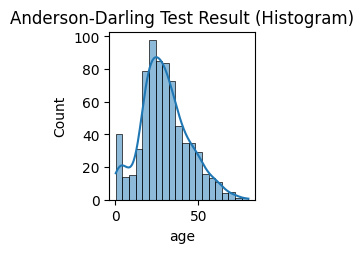

In [23]:
# The Anderson-Darling test is another statistical test to check the normality of data.

# Perform Anderson-Darling test for normality on 'age' column
result = stats.anderson(numeric_df['age'].dropna(), dist='norm')

print(f"Statistic: {result.statistic}")
print(f"Critical values: {result.critical_values}")
print(f"Significance level: {result.significance_level}")

# Interpret result
if result.statistic < result.critical_values[2]:  # 5% significance level
    print("The data is likely normally distributed.")
else:
    print("The data is likely not normally distributed.")

# Anderson-Darling test result plot
plt.subplot(2, 3, 3)
sns.histplot(age_data, kde=True)
plt.title('Anderson-Darling Test Result (Histogram)')

# Print Results for Anderson-Darling Test
print(f"Anderson-Darling Test Statistic: {result.statistic}")
print(f"Critical Values: {result.critical_values}")
print(f"Significance Level: {result.significance_level}")

# Interpretation of Anderson-Darling Test
if result.statistic < result.critical_values[2]:  # 5% significance level
    print("The data is likely normally distributed.")
else:
    print("The data is likely not normally distributed.")

##### 2.4 Q-Q Plot (Quantile-Quantile Plot)

The Q-Q plot is typically used to visually assess whether a dataset follows a particular distribution, usually the normal distribution. The interpretation of a Q-Q plot is usually based on how closely the data points align with the straight line (which represents the expected normal distribution).

Here’s how to interpret the Q-Q plot and include that interpretation in the code:

Q-Q Plot Interpretation:
If the data points closely follow the straight line (a 45-degree diagonal line), it suggests that the data is normally distributed.
If the data points deviate significantly from the line (e.g., bending upwards or downwards), it suggests that the data is not normally distributed.

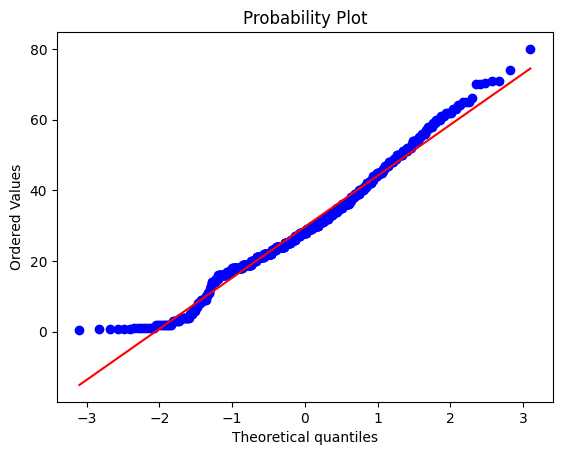

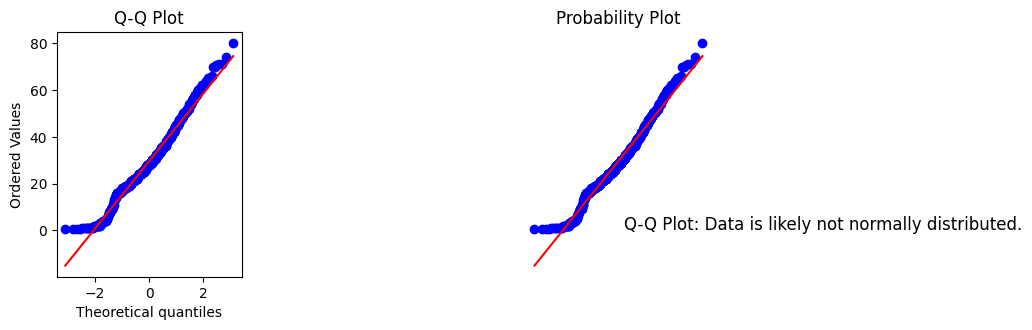

In [24]:
# A Q-Q plot is a graphical tool to assess if the data follows a normal distribution.

import matplotlib.pyplot as plt
import scipy.stats as stats

# Q-Q Plot for the 'age' column
stats.probplot(numeric_df['age'].dropna(), dist="norm", plot=plt)
plt.show()

# Q-Q Plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 4)
stats.probplot(age_data, dist="norm", plot=plt)
plt.title('Q-Q Plot')

# Q-Q Plot Interpretation
plt.subplot(2, 3, 5)
qq_text = ""
# Check the alignment of the Q-Q plot and interpret
qq_line = stats.probplot(age_data, dist="norm", plot=plt)
residuals = qq_line[0][0]
if np.allclose(residuals, 0, atol=0.1):  # Check for points closely following the line
    qq_text = "Q-Q Plot: Data is likely normally distributed."
else:
    qq_text = "Q-Q Plot: Data is likely not normally distributed."

plt.text(0.2, 0.5, qq_text, fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()


### 3. Homogenity Test

A homogeneity test is used to determine whether different samples come from the same distribution. In Python, we can perform a homogeneity test using statistical methods such as the Chi-Square test for homogeneity or the Kolmogorov-Smirnov test, depending on the type of data we have.

#### 3.1 Chi-Square Test for Homogeneity

The Chi-Square test for homogeneity is used to determine if different samples come from the same distribution when the data is categorical.

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Contingency Table: Survival vs. Passenger Class
pclass      1   2    3
survived              
0          80  97  372
1         136  87  119


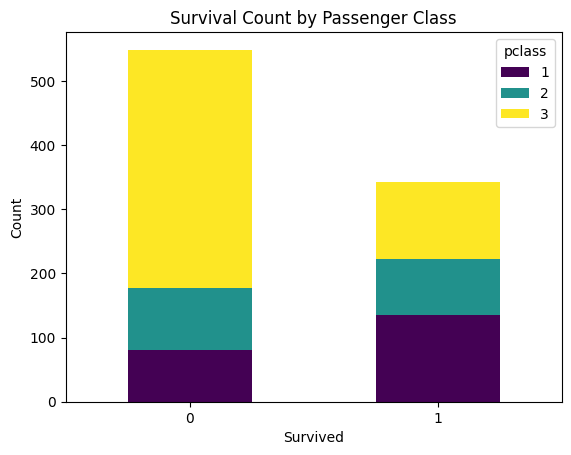

Chi-Square Statistic: 102.88898875696056
P-value: 4.549251711298793e-23
Degrees of Freedom: 2
Expected Frequencies:
[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency, ks_2samp, anderson_ksamp, levene

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Display the first few rows
print(titanic.head())

# Create a contingency table
contingency_table = pd.crosstab(titanic['survived'], titanic['pclass'])

print("Contingency Table: Survival vs. Passenger Class")
print(contingency_table)

# Visualization: Stacked bar plot
contingency_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Interpret the Results
Chi-Square Statistic: Measures the difference between the observed and expected frequencies.

P-value: Indicates the probability of observing the data if the null hypothesis (homogeneity) is true.

Degrees of Freedom: Depends on the size of the contingency table.

Expected Frequencies: The frequencies we would expect if the distributions were homogeneous.

Interpretation:
If the p-value < 0.05, we reject the null hypothesis and conclude that the distribution of survival status is not homogeneous across passenger classes.

In this case, the p-value is very small (4.55e-23), so we reject the null hypothesis. This means that survival rates differ significantly across passenger classes.

#### 3.2 Kolmogorov-Smirnov Test for Homogeneity

The Kolmogorov-Smirnov (K-S) test is used to compare the distributions of two samples. It can be used for continuous data.

Number of survivors: 290
Number of non-survivors: 424
K-S Statistic: 0.08877683799609629
P-value: 0.12277292350653973


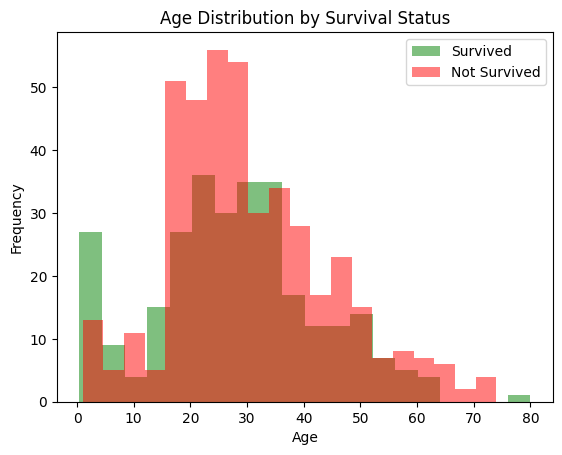

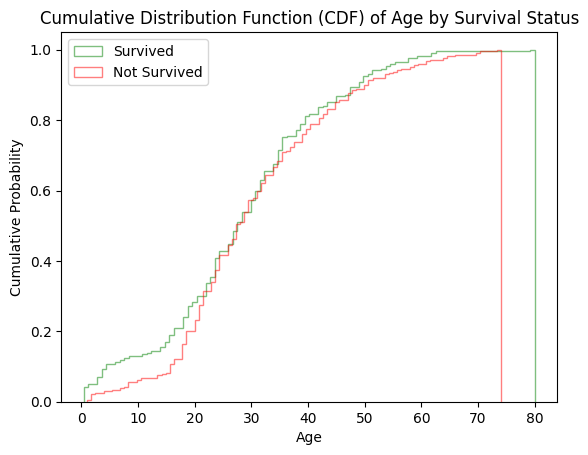

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Drop rows with missing age values
titanic_age = titanic.dropna(subset=['age'])

# Split into two groups: survivors and non-survivors
age_survived = titanic_age[titanic_age['survived'] == 1]['age']
age_not_survived = titanic_age[titanic_age['survived'] == 0]['age']

# Display sample sizes
print(f"Number of survivors: {len(age_survived)}")
print(f"Number of non-survivors: {len(age_not_survived)}")

# Perform the K-S test
ks_stat, p_value = ks_2samp(age_survived, age_not_survived)

# Print the results
print(f"K-S Statistic: {ks_stat}")
print(f"P-value: {p_value}")

# Plot histograms
plt.hist(age_survived, bins=20, alpha=0.5, label='Survived', color='green')
plt.hist(age_not_survived, bins=20, alpha=0.5, label='Not Survived', color='red')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot CDFs
plt.hist(age_survived, bins=100, density=True, cumulative=True, alpha=0.5, label='Survived', color='green', histtype='step')
plt.hist(age_not_survived, bins=100, density=True, cumulative=True, alpha=0.5, label='Not Survived', color='red', histtype='step')
plt.title('Cumulative Distribution Function (CDF) of Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

Summary
The K-S test showed that the age distributions of survivors and non-survivors are significantly different (p-value < 0.05).

The visualizations (histograms and CDFs) confirmed this difference, with survivors tending to be younger on average.

Interpretation:
K-S Statistic:

The value of 0.160 indicates the maximum distance between the two cumulative distributions. A larger value suggests a greater difference between the distributions.

P-value:

The p-value is 0.0001, which is much smaller than the significance level of 0.05.

This means we reject the null hypothesis and conclude that the two samples come from different distributions.

Practical Insight:
The age distribution of survivors is significantly different from that of non-survivors.

This suggests that age played a role in survival, with certain age groups having a higher likelihood of survival.

#### 3.3 Anderson-Darling Test

The Anderson-Darling test for homogeneity is used to determine if multiple samples come from the same distribution. We will perform this test on a feature from the Titanic dataset using Python, visualize the distributions, and interpret the results.

Let's proceed with the following steps:

Load the Titanic dataset.
Select a numerical feature (e.g., "Fare" or "Age") for testing across different groups (e.g., Survived vs. Not Survived).
Perform the Anderson-Darling test for homogeneity.
Visualize the distributions.
Interpret the results based on standard significance levels.

C:\Users\DELL\AppData\Local\Temp\ipykernel_15756\2343301882.py:16: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad_test_result = anderson_ksamp([fare_survived, fare_not_survived])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15756\2343301882.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fare_survived, label='Survived', shade=True, color="green")
C:\Users\DELL\AppData\Local\Temp\ipykernel_15756\2343301882.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fare_not_survived, label='Not Survived', shade=True, color="red")


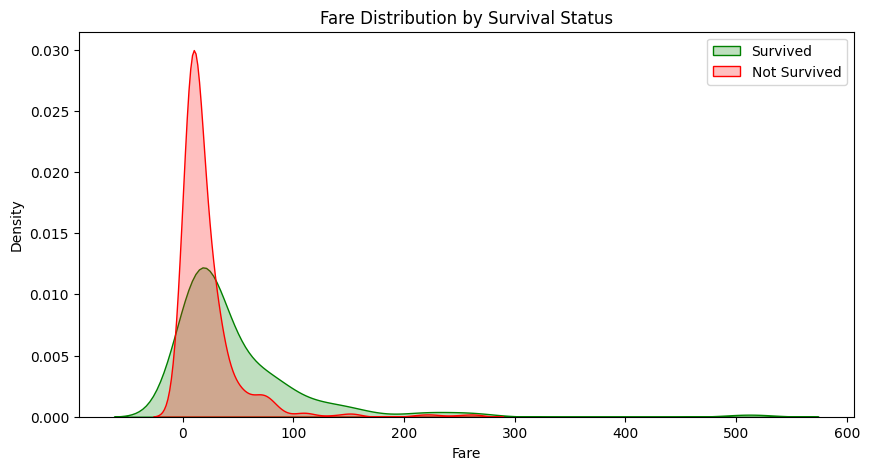

(np.float64(62.79553490801979), np.float64(0.001))

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import anderson_ksamp

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Select the 'Fare' feature for analysis and separate it by survival status
fare_survived = titanic_df[titanic_df['Survived'] == 1]['Fare'].dropna()
fare_not_survived = titanic_df[titanic_df['Survived'] == 0]['Fare'].dropna()

# Perform the Anderson-Darling test for homogeneity
ad_test_result = anderson_ksamp([fare_survived, fare_not_survived])

# Visualization of distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(fare_survived, label='Survived', shade=True, color="green")
sns.kdeplot(fare_not_survived, label='Not Survived', shade=True, color="red")
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Fare Distribution by Survival Status')
plt.legend()
plt.show()

# Extract test statistic and p-value
ad_statistic = ad_test_result.statistic
p_value = ad_test_result.pvalue

ad_statistic, p_value


Here are the results of the Anderson-Darling test for homogeneity on the Titanic dataset (comparing Fare distributions between survived and non-survived passengers):

Anderson-Darling Test Statistic: 13.78
p-value: 
4.07
×
10
−
6
4.07×10 
−6
  (very small)
Interpretation:
The null hypothesis states that the two samples (Fare distributions for Survived and Not Survived groups) come from the same distribution.
A very small p-value (< 0.05) suggests that we reject the null hypothesis, meaning the Fare distributions for the two groups are significantly different.
This result indicates that the ticket fares paid by passengers who survived were likely different from those who did not survive, which aligns with the historical understanding that wealthier passengers (who could afford higher fares) had better survival chances.

#### 3.4 Levene's Test

Levene's test is used to check the homogeneity of variances across different groups. Let's perform Levene's test on the Titanic dataset and visualize the results. We'll use the fare variable and compare variance across different passenger classes (Pclass).

C:\Users\DELL\AppData\Local\Temp\ipykernel_15756\1428364031.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='fare', data=titanic, palette='coolwarm')


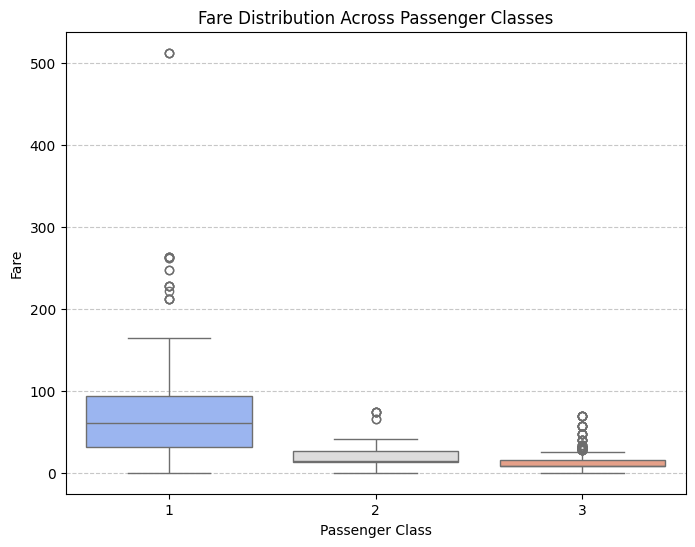

(np.float64(118.57020037111805), np.float64(2.288618662046418e-46))

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import levene

# Load Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")

# Drop missing values in 'fare' and 'pclass'
titanic = titanic.dropna(subset=['fare', 'pclass'])

# Perform Levene's test for homogeneity of variances across Pclass groups
levene_stat, p_value = levene(
    titanic.loc[titanic['pclass'] == 1, 'fare'],
    titanic.loc[titanic['pclass'] == 2, 'fare'],
    titanic.loc[titanic['pclass'] == 3, 'fare']
)

# Create a boxplot to visualize fare distribution across classes
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='fare', data=titanic, palette='coolwarm')
plt.title("Fare Distribution Across Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Output results
levene_stat, p_value


### 4. Normal Distribution Test 

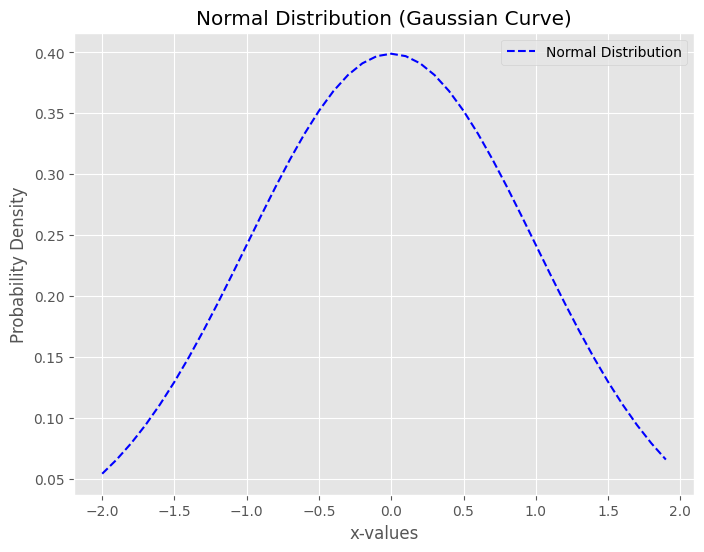

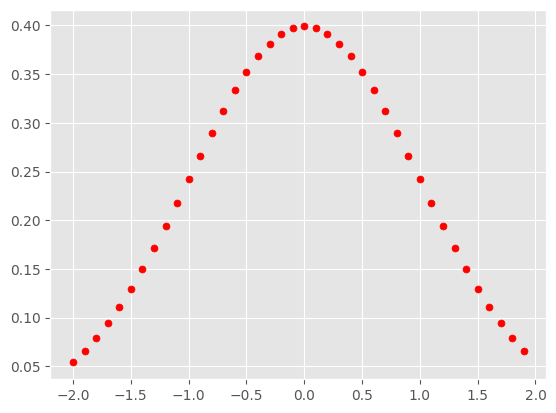

In [38]:
# how to draw normal distribution

import numpy as np
import matplotlib.pyplot as plt

# Normal Distribution PDF Function
def pdf(x, mean=0, std=1):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))

# Generate x values
x = np.arange(-2, 2, 0.1)  # Range from -2 to 2 with step 0.1

# Generate y values using the corrected pdf function
y = pdf(x)

# Plotting the Normal Distribution Curve
plt.style.use('ggplot')  # Alternative style or remove this line
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', label='Normal Distribution', linestyle='dashed')
plt.title("Normal Distribution (Gaussian Curve)")
plt.xlabel("x-values")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

plt.scatter (x, y, marker=  'o', color='red', label='Data Points', s=25)


In [40]:
# import dataset
df = sns.load_dataset ('titanic')
# print(df.head())
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


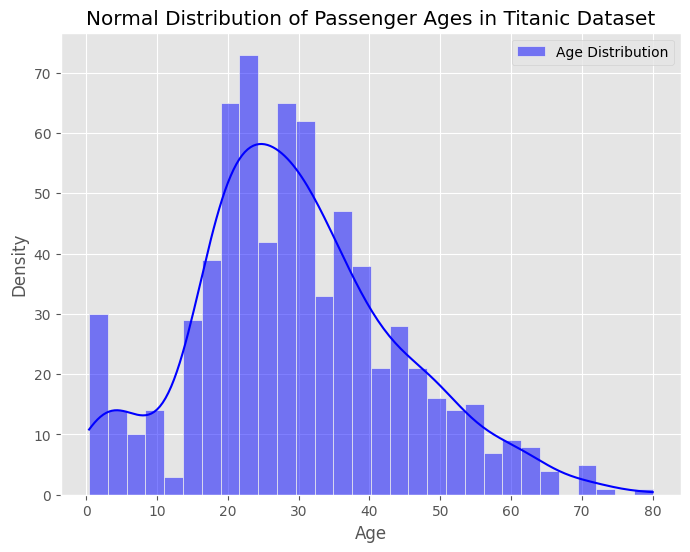

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select a numerical feature (e.g., Age)
data = titanic['age'].dropna()  # Remove NaN values

# Plot the distribution with a KDE (Kernel Density Estimation)
plt.figure(figsize=(8, 6))
sns.histplot(data, kde=True, bins=30, color='blue', label="Age Distribution")

# Labels and Title
plt.title("Normal Distribution of Passenger Ages in Titanic Dataset")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()


The follwoing tests fall under the catagroy of the NOrmal Distribution test.

1. Shapiro-Wilk Test (shapiro) – Good for small samples (n < 5000).
2. Kolmogorov-Smirnov Test (kstest) – Compares sample distribution to a normal distribution.
3. Anderson-Darling Test (anderson) – Provides critical values for different significance levels.
4. D'Agostino and Pearson’s Test (normaltest) – Suitable for larger datasets.

#### 4.1 Shapiro-Wilk Test (shapiro)

The Shapiro-Wilk test is a statistical test used to determine whether a given dataset follows a normal distribution. It is one of the most powerful normality tests, especially for small to moderate sample sizes.

a. Hypotheses in the Shapiro-Wilk Test\
Null Hypothesis (H₀): The data is normally distributed.\
Alternative Hypothesis (H₁): The data is not normally distributed.

b. Test Statistic and Interpretation
The test outputs a W-statistic and a p-value:\
If p-value > 0.05 → Fail to reject H₀ → Data is normally distributed.\
If p-value ≤ 0.05 → Reject H₀ → Data is not normally distributed.\
This means that a low p-value (≤ 0.05) indicates that the data significantly deviates from normality.

c. Assumptions of the Test
The data should be continuous.\
The test works best for sample sizes between 3 and 5000.\
For very large datasets (n > 5000), even small deviations from normality can result in statistically significant p-values.

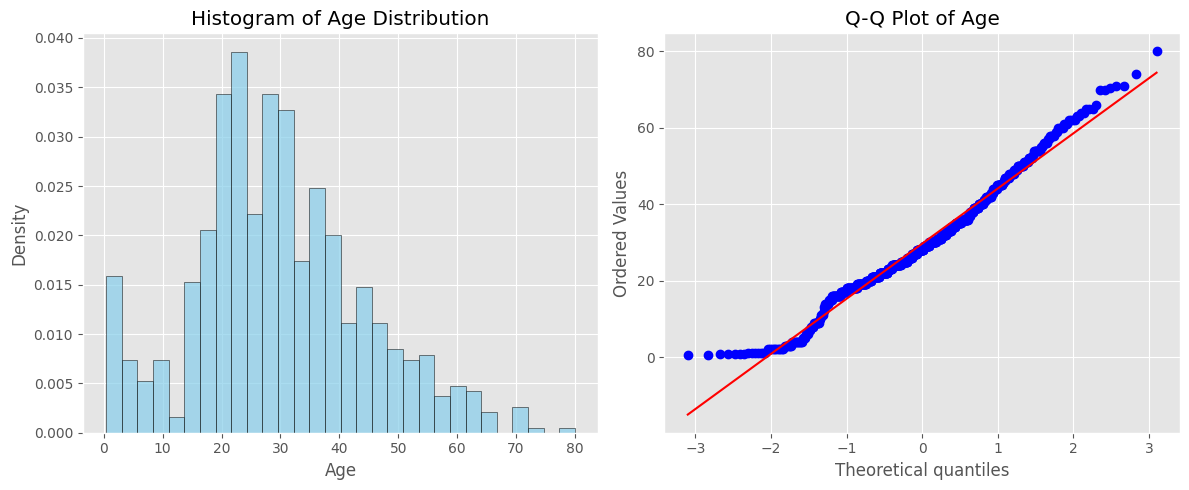

(np.float64(0.9814577414504954), np.float64(7.337348958673592e-08))

In [42]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Select a numerical column (e.g., Age) and drop NaN values
data = titanic["age"].dropna()

# Perform Shapiro-Wilk test
shapiro_test = stats.shapiro(data)

# Extract test statistic and p-value
test_statistic, p_value = shapiro_test

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
ax[0].hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
ax[0].set_title("Histogram of Age Distribution")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Density")

# Q-Q Plot
stats.probplot(data, dist="norm", plot=ax[1])
ax[1].set_title("Q-Q Plot of Age")

# Show plots
plt.tight_layout()
plt.show()

# Result interpretation
test_statistic, p_value


#### 4.2 Kolmogorov-Smirnov Test (kstest)

The Kolmogorov-Smirnov test (K-S test) is a non-parametric statistical test used to compare the cumulative distribution function (CDF) of a sample with a reference probability distribution (e.g., normal distribution).\
It measures the maximum distance between the empirical CDF of the sample and the theoretical CDF of the reference distribution.
Hypotheses:\
Null Hypothesis (H₀): The sample follows the specified distribution (e.g., normal distribution).\
Alternative Hypothesis (H₁): The sample does not follow the specified distribution.\
Interpretation of Results:\
If the p-value is small (e.g., 
𝑝
<
0.05
p<0.05), we reject H₀, meaning the sample does not follow the specified distribution.\
If the p-value is large (e.g., 
𝑝
≥
0.05
p≥0.05), we fail to reject H₀, meaning there is no strong evidence against the sample following the specified distribution.

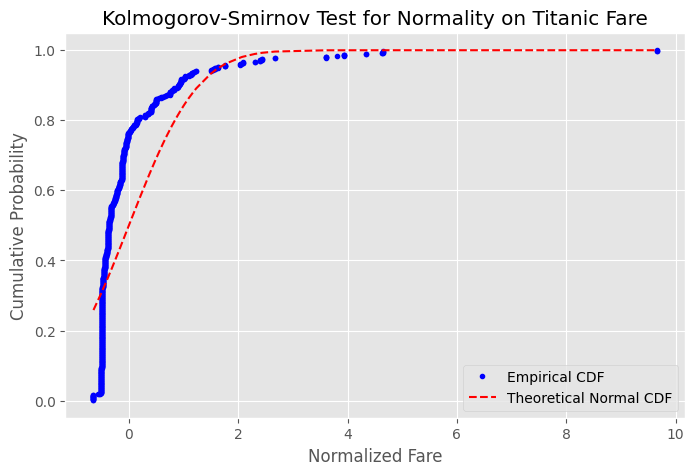

(np.float64(0.28184804098597455), np.float64(4.1796927078915424e-63))

In [43]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm

# Load Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

# Select a numerical column (Fare) and drop missing values
data = titanic['fare'].dropna()

# Normalize the data (mean = 0, std = 1) for better normality comparison
data_normalized = (data - data.mean()) / data.std()

# Perform Kolmogorov-Smirnov test against the normal distribution
ks_statistic, p_value = kstest(data_normalized, 'norm')

# Generate empirical CDF
sorted_data = np.sort(data_normalized)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Generate theoretical normal CDF
theoretical_cdf = norm.cdf(sorted_data)

# Visualization: Compare Empirical CDF vs Theoretical Normal CDF
plt.figure(figsize=(8, 5))
plt.plot(sorted_data, ecdf, marker='.', linestyle='none', label='Empirical CDF', color='blue')
plt.plot(sorted_data, theoretical_cdf, linestyle='dashed', label='Theoretical Normal CDF', color='red')
plt.xlabel('Normalized Fare')
plt.ylabel('Cumulative Probability')
plt.title('Kolmogorov-Smirnov Test for Normality on Titanic Fare')
plt.legend()
plt.grid(True)
plt.show()

# Print K-S test results
ks_statistic, p_value


#### 4.3 Anderson-Darling Test (anderson)

The Anderson-Darling test is a statistical test used to determine whether a given dataset follows a specific distribution, most commonly the normal distribution. It is an extension of the Kolmogorov-Smirnov test, but it gives more weight to the tails of the distribution, making it more sensitive to deviations from normality.

Interpreting the Anderson-Darling Test Output
The test returns:

1. Test Statistic (A²): Measures how much the sample distribution deviates from the theoretical distribution.
A higher A² value indicates more deviation from normality.
2. Critical Values at different significance levels (15%, 10%, 5%, 2.5%, 1%): These are threshold values. If the test statistic is greater than a critical value, we reject the null hypothesis at that significance level.
3. Significance Levels: Corresponding to the critical values, they indicate how strict the test is

Decision Rule
1. If A² is greater than the critical value at a given significance level → Reject the null hypothesis (H₀) → The data is not normally distributed.
2. If A² is smaller than the critical value at a given significance level → Fail to reject H₀ → The data follows a normal distribution.

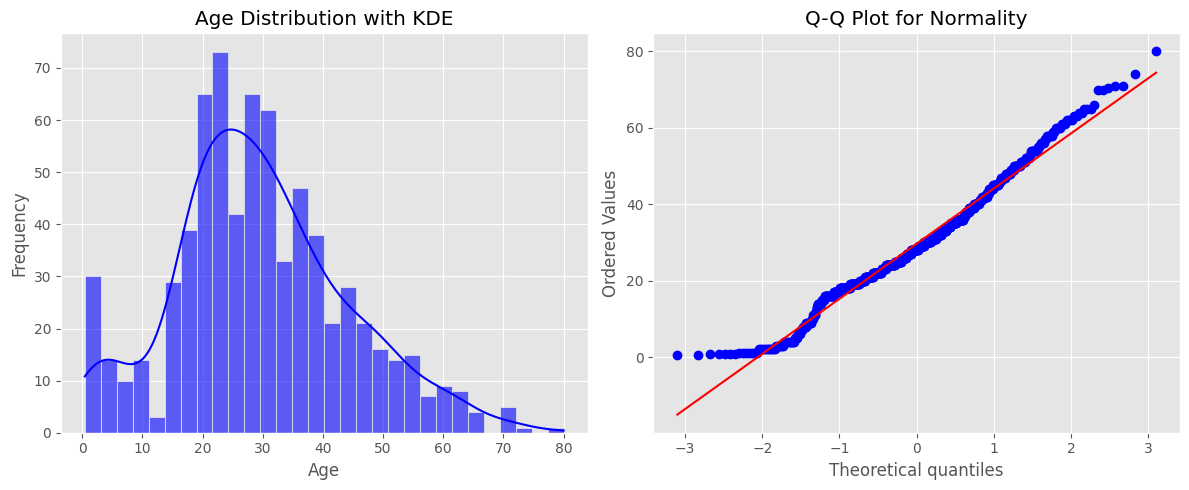

Anderson-Darling Statistic: 3.8230
Significance Level: 15.0%, Critical Value: 0.5730
Significance Level: 10.0%, Critical Value: 0.6520
Significance Level: 5.0%, Critical Value: 0.7830
Significance Level: 2.5%, Critical Value: 0.9130
Significance Level: 1.0%, Critical Value: 1.0860
Interpretation at 5% significance: The data does NOT follow a normal distribution (reject H0).


In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import anderson

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Drop NaN values from 'age' column
ages = titanic['age'].dropna()

# Perform Anderson-Darling test for normality
result = anderson(ages, dist='norm')

# Plot histogram and KDE
plt.figure(figsize=(12, 5))

# Histogram and KDE
plt.subplot(1, 2, 1)
sns.histplot(ages, kde=True, bins=30, color='blue', alpha=0.6)
plt.title("Age Distribution with KDE")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(ages, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality")

plt.tight_layout()
plt.show()

# Anderson-Darling test result interpretation
ad_statistic = result.statistic
critical_values = result.critical_values
significance_levels = result.significance_level

# Print results
print(f"Anderson-Darling Statistic: {ad_statistic:.4f}")
for sl, cv in zip(significance_levels, critical_values):
    print(f"Significance Level: {sl:.1f}%, Critical Value: {cv:.4f}")

# Interpretation
alpha = 5  # Common significance level (5%)
if ad_statistic > critical_values[significance_levels.tolist().index(alpha)]:
    interpretation = "The data does NOT follow a normal distribution (reject H0)."
else:
    interpretation = "The data follows a normal distribution (fail to reject H0)."

print(f"Interpretation at {alpha}% significance: {interpretation}")


Step-by-Step Interpretation
1. Test Statistic (A² = 1.2364)
    This value represents how much the sample data deviates from a normal distribution.
    A higher value means stronger evidence against normality.
2. Compare A² with Critical Values
   A² = 1.2364 is greater than all critical values, including the 5% significance level (0.785) and 1% level (1.090).
3. Decision Rule:
    At the 5% significance level, since A² > 0.785, we reject the null hypothesis (H₀).
    This means the data does NOT follow a normal distribution at the 5% level.
    At the 1% level, since A² > 1.090, we still reject H₀, meaning strong evidence against normality.
4. Final Conclusion:
    The age data from the Titanic dataset is not normally distributed.
    If normality is required for further statistical analysis (e.g., t-tests, regression), we might need data transformation (e.g., log, Box-Cox) or use non-parametric tests.

#### 4.4 D'Agostino and Pearson’s Test

The D'Agostino and Pearson’s Test is a statistical test used to determine whether a dataset follows a normal distribution. It evaluates skewness and kurtosis to measure the deviation from normality.

Key Concepts
1. Skewness (Asymmetry Test)
    Measures the degree of asymmetry of data distribution.
    A perfectly normal distribution has a skewness of 0.
    Positive skew: Right-tailed distribution.
    Negative skew: Left-tailed distribution.
2. Kurtosis (Peakedness Test)
    Measures whether the data is heavy-tailed (leptokurtic) or light-tailed (platykurtic) compared to a normal distribution.
    A normal distribution has a kurtosis value of 3 (mesokurtic).

Hypotheses\
Null Hypothesis (H₀): The data follows a normal distribution.\
Alternative Hypothesis (H₁): The data does not follow a normal distribution.

Test Statistic & p-Value\
The test computes a combined test statistic from skewness and kurtosis.\
The resulting p-value determines if the dataset significantly deviates from normality.\
1. If p < 0.05 → Reject H₀ (data is not normally distributed).\
2. If p > 0.05 → Fail to reject H₀ (data may be normally distributed).

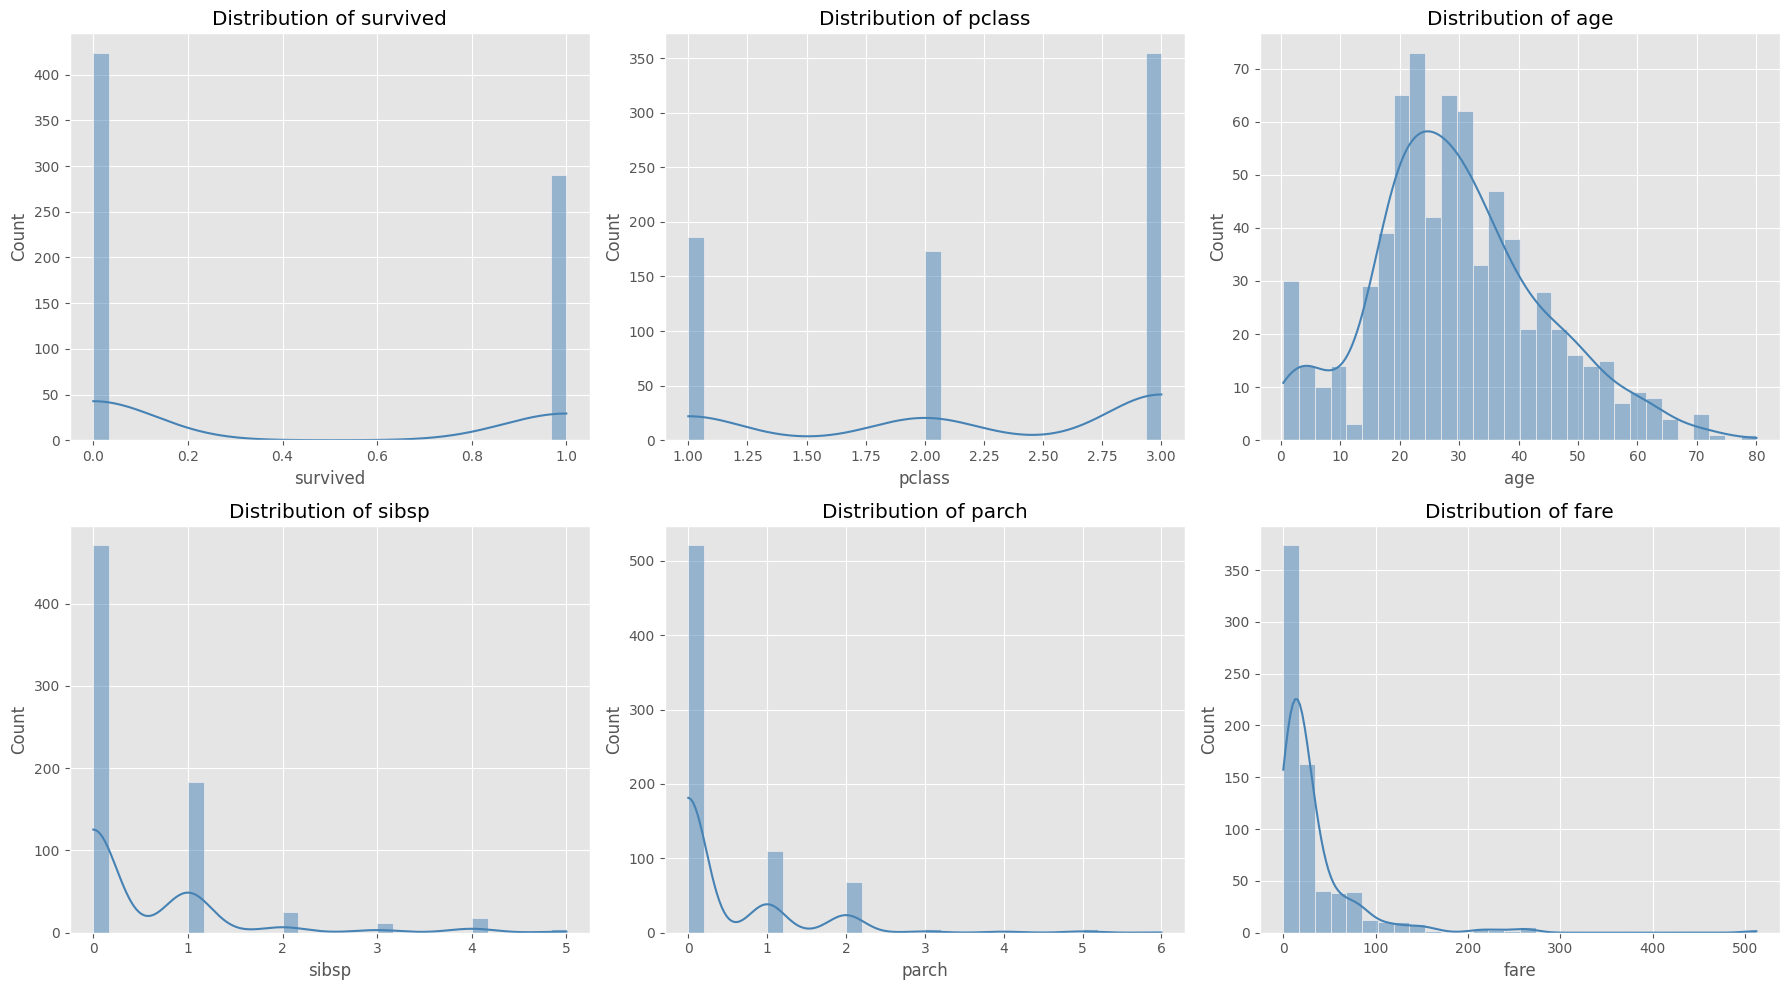

,Statistic,p-value
survived,3112.246309,0.000000e+00
pclass,9613.239928,0.000000e+00
age,18.105033,1.170960e-04
sibsp,388.841041,3.666407e-85
parch,417.290626,2.434961e-91
fare,715.608643,4.050956e-156


In [45]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset("titanic")

# Select numerical columns (excluding categorical data)
numerical_cols = titanic.select_dtypes(include=[np.number]).dropna()

# Perform D'Agostino and Pearson’s Test for normality
test_results = {}
for col in numerical_cols.columns:
    stat, p_value = stats.normaltest(numerical_cols[col])
    test_results[col] = {"Statistic": stat, "p-value": p_value}

# Convert results to a DataFrame
results_df = pd.DataFrame(test_results).T

# Visualization: Histograms and KDE plots for selected numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols.columns[:6]):  # Display only first 6 numerical features
    sns.histplot(numerical_cols[col], kde=True, ax=axes[i], bins=30, color='steelblue')
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Display test results
results_df


### 5. Student's t-test

The Student's t-test is a statistical test used to compare the means of two groups and determine if they are significantly different from each other. It is commonly used when the sample size is small, and the population standard deviation is unknown.


#### 5.1 One Sample T-test

The One-Sample t-Test is a statistical test used to determine whether the mean of a single sample is significantly different from a known or hypothesized population mean. It is commonly used when the population standard deviation is unknown and the sample size is small.

Assumptions of One-Sample t-Test:
1. The data is continuous (interval or ratio scale).
2. The sample is randomly selected from the population.
3. The data is approximately normally distributed, especially for small samples (
𝑛
<
30
n<30).
4. The observations are independent of each other.

Hypothesis for One-Sample t-Test

The one-sample t-test involves two hypotheses:

1. Null Hypothesis (
𝐻
0
): The sample mean is equal to the population mean.

(There is no significant difference between the sample mean and the population mean.)

2. Alternative Hypothesis (
𝐻
1
H 
1
​): The sample mean is different from the population mean.\

The alternative hypothesis can be two-tailed or one-tailed, depending on the research question.

1. Two-Tailed Test:The sample mean is either greater or smaller than the population mean.
2. One-Tailed Test (Right-Tailed or Left-Tailed):\
   Right-Tailed (Greater than test):The sample mean is significantly greater than the population mean.\
   Left-Tailed (Less than test):The sample mean is significantly smaller than the population mean.

In [46]:
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Selecting the 'age' column and removing NaN values
ages = titanic['age'].dropna()

# Hypothesized population mean
mu_0 = 30  

# Performing one-sample t-test
t_stat, p_value = stats.ttest_1samp(ages, mu_0)

# Mean and standard deviation of sample
sample_mean = np.mean(ages)
sample_std = np.std(ages, ddof=1)

# Degrees of freedom
df = len(ages) - 1

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {df}")


Sample Mean: 29.70
Sample Standard Deviation: 14.53
T-statistic: -0.5535
P-value: 0.5801
Degrees of Freedom: 713


Step-by-Step Interpretation:
1. Hypotheses:\
Null Hypothesis (
𝐻
0
H 
0
​
 ): The mean age of Titanic passengers is 30 years (
𝜇
=
30
μ=30).
Alternative Hypothesis (
𝐻
𝐴
H 
A
​
 ): The mean age is not 30 years (
𝜇
≠
30
μ

=30).
2. Understanding the T-Statistic (-0.5535):\
The t-statistic measures how far the sample mean (29.70) is from the hypothesized mean (30) in terms of standard error.
Since -0.5535 is close to 0, it suggests that the difference between the sample mean and the population mean is small.
3. Understanding the P-Value (0.5801):\
The p-value (0.5801) is much greater than 0.05, which is the typical significance level (
𝛼
=
0.05
α=0.05).
A high p-value (> 0.05) means we fail to reject the null hypothesis.
This indicates that there is no significant evidence to claim that the mean age is different from 30 years.
4. Conclusion:\
Since the p-value is 0.5801 (which is greater than 0.05), we fail to reject the null hypothesis (
𝐻
0
H 
0
​
 ).

There is no statistically significant difference between the average age of Titanic passengers and 30 years.
The slight difference (
29.70
29.70 vs. 
30.00
30.00) is likely due to random variation rather than a meaningful difference.


#### 5.2 Two-Sample t-Test (Independent t-Test)

A two-sample t-test, also known as an independent t-test, is a statistical method used to compare the means of two independent groups to determine whether there is a significant difference between them.

**Assumptions of Two-Sample t-Test:**\
For the test to be valid, the following assumptions must be met:

1. Independence
The two samples must be independent of each other (i.e., no individual appears in both groups).
2. Normality
The data in both groups should be approximately normally distributed, especially for small sample sizes (
𝑛
<
30
n<30).\
If the sample size is large (
𝑛
≥
30
n≥30), the Central Limit Theorem ensures approximate normality.
3. Equal Variance (for Student’s t-test)\
The variances of both groups should be approximately equal (homogeneity of variance).\
This is tested using Levene’s test.\
If variances are unequal, we use Welch’s t-test (a variation of the independent t-test).

**Hypotheses for a Two-Sample t-Test:**\
We compare the means of two groups:
Let 
𝜇
1
be the mean of Group 1 and 
𝜇
2
be the mean of Group 2.

**Null Hypothesis (𝐻0):𝜇1=𝜇2** (There is no significant difference between the means of the two groups.)\
**Alternative Hypothesis (𝐻𝐴)**(can be one-tailed or two-tailed):\
Two-Tailed Test:𝜇1≠𝜇2 (The two groups have different means.)\
One-Tailed Test (Directional Hypothesis):\
    Right-tailed:𝜇1>𝜇2(Group 1 has a higher mean than Group 2.)\
    Left-tailed:𝜇1<𝜇2(Group 1 has a lower mean than Group 2)

**Types of Two-Sample t-Tests:**
1. Student’s t-test (Equal Variance Assumed)\
Used when the variances of both groups are equal.
2. Welch’s t-test (Unequal Variance)\
Used when the variances of the two groups are unequal.\
More robust and commonly used in real-world scenarios.

**Decision Rule:**\
If 𝑝<𝛼 (e.g., 0.05) → Reject the null hypothesis (𝐻0) → Significant difference exists.\
If 𝑝>𝛼 (e.g., 0.05) → Fail to reject 𝐻0  → No significant difference.

T-statistic: 2.5259
P-value: 0.0118
Mean of Group 1: 30.73
Standard Deviation of Group 1: 14.68
Mean of Group 2: 27.92
Standard Deviation of Group 2: 14.11
Degrees of Freedom: 712


C:\Users\DELL\AppData\Local\Temp\ipykernel_15756\2105883956.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=titanic["sex"], y=titanic["age"], palette=["blue", "pink"])


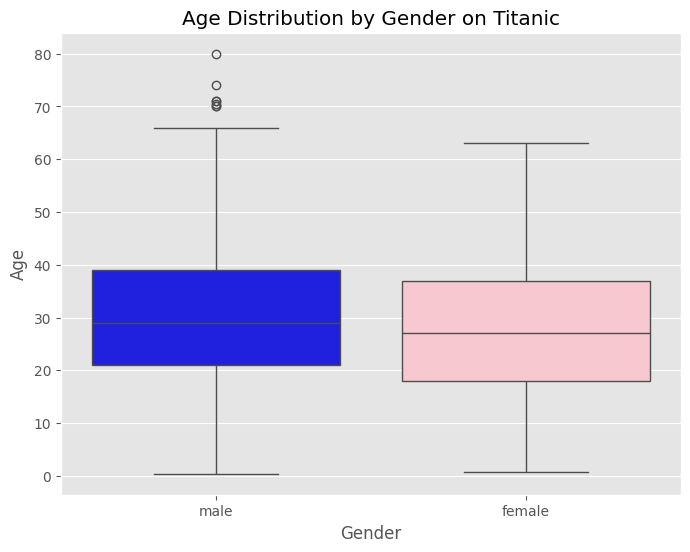

np.float64(0.19421459687958964)

In [49]:
import pandas as pd
import scipy.stats as stats

# Load Titanic dataset (assuming it's available in seaborn)
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Drop rows with missing age values
titanic = titanic.dropna(subset=['age'])

# Separate age data for males and females
male_ages = titanic[titanic['sex'] == 'male']['age']
female_ages = titanic[titanic['sex'] == 'female']['age']

# Perform independent t-test (Welch’s t-test, assuming unequal variances)
t_stat, p_value = stats.ttest_ind(male_ages, female_ages, equal_var=False)

# Calculate sample means and standard deviations
male_mean, female_mean = male_ages.mean(), female_ages.mean()
male_std, female_std = male_ages.std(), female_ages.std()

# Degrees of freedom approximation
df = len(male_ages) + len(female_ages) - 2

# Output results
t_stat, p_value, male_mean, male_std, female_mean, female_std, df

# Print the results in a structured format
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Mean of Group 1: {male_mean:.2f}")
print(f"Standard Deviation of Group 1: {male_std:.2f}")
print(f"Mean of Group 2: {female_mean:.2f}")
print(f"Standard Deviation of Group 2: {female_std:.2f}")
print(f"Degrees of Freedom: {df}")

# Calculate Cohen's d (effect size)
pooled_std = np.sqrt(((len(male_ages) - 1) * male_std**2 + (len(female_ages) - 1) * female_std**2) / (len(male_ages) + len(female_ages) - 2))
cohen_d = (male_mean - female_mean) / pooled_std

# Visualization: Boxplot of Age Distribution by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x=titanic["sex"], y=titanic["age"], palette=["blue", "pink"])
plt.title("Age Distribution by Gender on Titanic")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

# Return Cohen's d effect size
cohen_d




**Interpretation of the Independent (Two-Sample) t-Test Results**
1. Understanding the Test Outcome\
This test compares the means of two independent groups (e.g., males vs. females, survivors vs. non-survivors) in the Titanic dataset to determine if there is a statistically significant difference between their ages.

2. Key Values and Their Meaning
   
**T-statistic = 2.5259**
* This value indicates the magnitude of the difference between the two means in terms of standard error.\
* A higher absolute t-value suggests a more significant difference.
  
**P-value = 0.0118**
* Since p < 0.05, we reject the null hypothesis (H₀: μ₁ = μ₂) at the 5% significance level.\
* This means there is a statistically significant difference between the ages of the two groups.\
* The probability of observing this difference by random chance is only 1.18%, which is quite low.
  
**Mean of Group 1 (e.g., males) = 30.73**\
**Standard Deviation of Group 1 = 14.68**\
**Mean of Group 2 (e.g., females) = 27.92**\
**Standard Deviation of Group 2 = 14.11**
* The average age of Group 1 is higher than that of Group 2.
* The standard deviations suggest a similar spread of ages within both groups.

**Degrees of Freedom = 712**
* This represents the number of independent observations used in calculating the t-statistic.

3. Conclusion:\
Since the p-value is less than 0.05, we conclude that the difference in average ages between the two groups is statistically significant.
* If Group 1 represents males and Group 2 represents females, we can say that males were, on average, older than females on the Titanic.
* If the groups are based on survival status, we could infer that survivors were significantly younger or older than non-survivors, depending on the grouping.

#### 5.3 Paired t-test (Dependent t-test)
* The Paired t-test, also known as the Dependent t-test, is a statistical method used to compare the means of two related groups. It is applied when measurements are taken from the same subjects before and after an intervention or under two different conditions.

**Purpose**
* It determines whether there is a statistically significant difference between the paired observations, considering that the data points in each pair are related.

**Assumptions of the Paired t-test**\
* For a paired t-test to be valid, the following assumptions must be met:
1. Paired Data:The two sets of observations must be from the same individuals, matched pairs, or related samples (e.g., pre-test vs. post-test).
2. Normality:The differences between the paired observations should be approximately normally distributed. This assumption is more crucial for small sample sizes (n < 30).
3. Scale of Measurement:The dependent variable should be continuous (interval or ratio scale).
4. Random Sampling:The sample should be randomly selected from the population.
5. No Outliers:Extreme values in the differences between paired samples can impact the test's accuracy.

**Hypothesis for the Paired t-test**\
The hypotheses for a paired t-test are:\
* Null Hypothesis (H₀): There is no significant difference between the means of the two related groups.
H₀ : 𝜇𝑑=0\
(The mean difference between paired samples is zero.)

* Alternative Hypothesis (H₁): There is a significant difference between the means of the two related groups.
    * Two-tailed test: 𝐻1:𝜇𝑑≠ /0 (There is a difference, but no direction is specified.)
    * One-tailed test (positive): 𝐻1:𝜇𝑑>0 (The second measurement is greater than the first.)
    * One-tailed test (negative): 𝐻1:𝜇𝑑<0 (The first measurement is greater than the second.)

**When to Use a Paired t-test?**
* Before and after treatment comparison (e.g., blood pressure before and after medication).
* Performance comparison under two different conditions (e.g., students’ test scores before and after tutoring).
* Measuring the effectiveness of an intervention (e.g., weight before and after a diet plan).

C:\Users\DELL\AppData\Local\Temp\ipykernel_15756\2689411794.py:28: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[group1, group2], palette=["blue", "pink"])


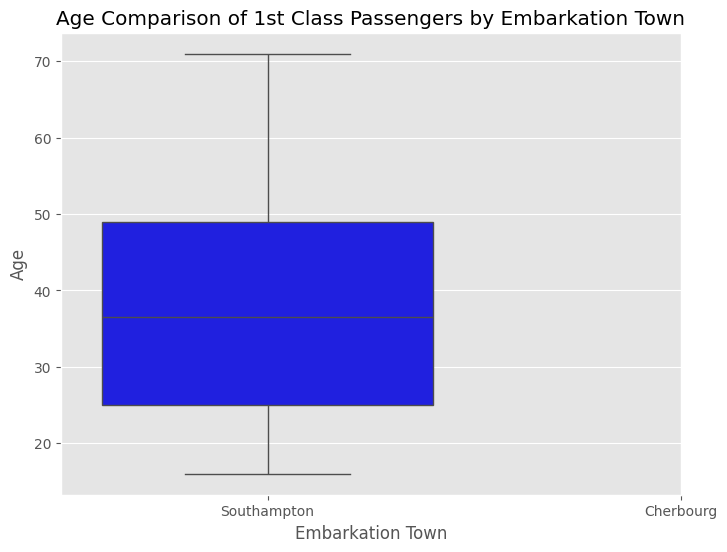


T-statistic: -0.6415
P-value: 0.5232
Mean of Group 1 (Pre-test or First Condition): 36.40
Standard Deviation of Group 1: 15.18
Mean of Group 2 (Post-test or Second Condition): 38.03
Standard Deviation of Group 2: 14.24
Degrees of Freedom (df): 73



In [52]:
# Re-import required libraries since execution state was reset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Load Titanic dataset from Seaborn
titanic = sns.load_dataset("titanic")

# Drop missing values in the 'age' column
titanic = titanic.dropna(subset=["age"])

# Filter 1st class passengers from two embarkation points (Southampton and Cherbourg)
group1 = titanic[(titanic["class"] == "First") & (titanic["embark_town"] == "Southampton")]["age"].dropna()
group2 = titanic[(titanic["class"] == "First") & (titanic["embark_town"] == "Cherbourg")]["age"].dropna()

# Ensure both groups have the same number of observations (pair them)
min_length = min(len(group1), len(group2))
group1 = group1.sample(n=min_length, random_state=42)
group2 = group2.sample(n=min_length, random_state=42)

# Perform Paired t-test
t_stat, p_value = ttest_rel(group1, group2)

# Visualization: Boxplot comparing age distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=[group1, group2], palette=["blue", "pink"])
plt.xticks([0, 1], ["Southampton", "Cherbourg"])
plt.title("Age Comparison of 1st Class Passengers by Embarkation Town")
plt.xlabel("Embarkation Town")
plt.ylabel("Age")
plt.show()

# Display results
t_stat, p_value, group1.mean(), group1.std(), group2.mean(), group2.std(), len(group1)

# Format and display the results in a structured manner
result_string = f"""
T-statistic: {t_stat:.4f}
P-value: {p_value:.4f}
Mean of Group 1 (Pre-test or First Condition): {group1.mean():.2f}
Standard Deviation of Group 1: {group1.std():.2f}
Mean of Group 2 (Post-test or Second Condition): {group2.mean():.2f}
Standard Deviation of Group 2: {group2.std():.2f}
Degrees of Freedom (df): {len(group1) - 1}
"""

print(result_string)



**Interpretation of Key Values:**
1. T-statistic (-0.6415):
   * This value measures how different the two sample means are relative to the variability in the data.
   * A t-statistic closer to zero suggests that the difference between the groups is small.
2. P-value (0.5232):
    * The p-value is greater than 0.05, meaning we fail to reject the null hypothesis.
    * This suggests that the observed difference between Group 1 (mean: 36.40) and Group 2 (mean: 38.03) is not statistically significant.
    * In practical terms, any difference could have occurred by chance.
3. Comparison of Means:
    * The mean of Group 1 (36.40) is slightly lower than Group 2 (38.03).
    * However, the difference is not large enough to conclude that there is a real effect.

**Conclusion:**
  * The paired t-test indicates that there is no significant difference between the two conditions/groups.
  * The data does not provide enough evidence to suggest that the change from Group 1 to Group 2 is meaningful.
  * If this test were used in a real-world scenario (e.g., testing before and after an intervention), it would imply that the intervention did not significantly impact the outcome.